In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt, distance_transform_cdt, distance_transform_bf
import PIL.Image as Image

MAGIC = 255

def get_distance_map(img_array: np.array, thresh: int = 10) -> np.array:
    black_mask = np.all(img_array[:, :, :3] <= [thresh, thresh, thresh], axis=-1) & (img_array[:, :, 3] >= MAGIC - thresh)
    dis_map = distance_transform_edt(~black_mask)
    return np.pow(dis_map / np.max(dis_map), 0.5)

def gradient_map(img: Image, thresh: int = 10) -> Image:
    if img.mode != 'RGBA':
        img = img.convert('RGBA')
    img_array = np.array(img)
    output_image = Image.new('RGBA', img_array.shape[0:2])
    dis_map = get_distance_map(img_array, thresh=thresh)
    pixels = output_image.load()

    for i in range(output_image.size[0]):
        for j in range(output_image.size[1]):
            pixels[i,j] = (int(MAGIC*dis_map[i,j]),
                            int(MAGIC*dis_map[i,j]),
                            int(MAGIC*dis_map[i,j]),
                            int(img_array[i,j,3]*dis_map[i,j]))

    return output_image


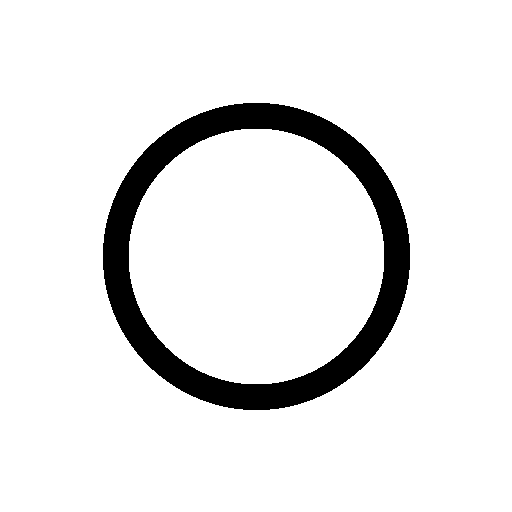

In [2]:
sz = 512
sample_image = Image.new('RGBA', (sz, sz))
pixels = sample_image.load()
for i in range(sample_image.size[0]):
    for j in range(sample_image.size[1]):
        dis = ((sz/2 - i)**2 + (sz/2 - j)**2)**(1/2)
        if dis < 0.25*sz:
            pixels[i,j] = (255, 255, 255, 255)
        elif 0.25*sz <= dis < 0.3*sz:
            pixels[i,j] = (0, 0, 0, 255)
        else:
            pixels[i,j] = (0, 0, 0, 0)
display(sample_image)

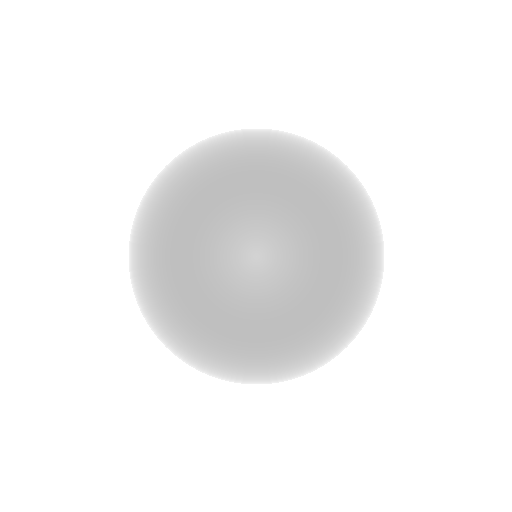

In [3]:
img = sample_image
output_image = gradient_map(img, thresh=3)

display(output_image)